# Setup

In [3]:
import os

import numpy as np
import matplotlib.pyplot as plt
import h5py

from slab.datamanagement import SlabFile
from pnaxpulseexperiment import PnaxPulseExperiment
from slab.dsfit import *
from run_pnax_seq_experiment import *

%matplotlib notebook

No module named 'visa'
Warning VISA library import failed
Could not load Autonics TM4 Driver
Loaded Instruments:  !


In [6]:
'''
General Experiments:
=======================
vacuum_rabi
cavity_ringdown
pulse_probe
Rabi
T1
Ramsey
Spin_Echo
raman
raman_rabi
raman_t1
raman_ramsey
raman_spin_echo
'''

data_path = "D:\\_data\\20230222_T162_blueforssnowy_coffin cavity test\\data\\Time Domain\\"

# Single Tone Spectroscopy

## Resonator Spectroscopy

In [5]:
filename='res_spec_pulse'

config_file='D:\\_data\\20230222_T162_blueforssnowy_coffin cavity test\\config_pnax_rabi.json'
#print(config_file)

exp_name = "vacuum_rabi"

fname=PnaxPulseExperiment(exp_name, config_file, filename=filename, path=data_path)

D:\_data\20230222_T162_blueforssnowy_coffin cavity test\data\Time Domain\ test0
D:\_data\20230222_T162_blueforssnowy_coffin cavity test\config_pnax_rabi.json test
D:\_data\20230222_T162_blueforssnowy_coffin cavity test\config_pnax_rabi.json test1


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


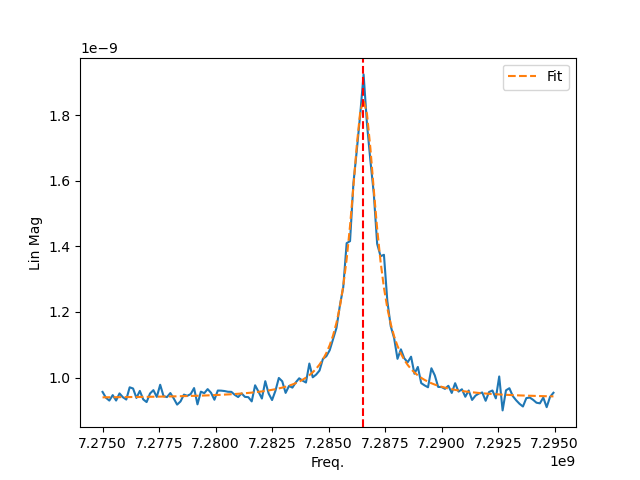

Resonator Frequency: 7286544054.139693


In [31]:
file = h5py.File(data_path + '00002_res_spec_pulse.h5' , 'r')

freq = np.array(file['readfreq_pts'])[0]
log_mag = np.array(file['mags'])
lin_mag = 10**(log_mag/10)/1000
phase = np.array(file['phases'])
read_power = np.array(file['read_power'])[0]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(freq, lin_mag)
ax.set_ylabel('Lin Mag')
ax.set_xlabel('Freq.')

p = fitlor(freq, lin_mag)
ax.plot(freq, lorfunc(p, freq), linestyle='--', label="Fit")

resonator_freq = p[2]
ax.axvline(resonator_freq, linestyle='--', c='r')
print("Resonator Frequency:", p[2])

ax.legend()

## Resonator Spectroscopy Power Sweep

In [25]:
filename='res_spec_pulse_powersweep'
config_file='D:\\_data\\20230222_T162_blueforssnowy_coffin cavity test\\config_pnax_rabi.json'
exp_name = "vacuum_rabi"

fname=PnaxPulseExperiment(exp_name, config_file, filename=filename, path=data_path)

D:\_data\20230222_T162_blueforssnowy_coffin cavity test\data\Time Domain\ test0
D:\_data\20230222_T162_blueforssnowy_coffin cavity test\config_pnax_rabi.json test
D:\_data\20230222_T162_blueforssnowy_coffin cavity test\config_pnax_rabi.json test1
{'aliases': {'pnax': 'PNAX'}, 'pulse_box_delay_adjust': {'pulse2': 0, 'pulse3': 0, 'pulse4': 0}, 'expt_trigger': {'period_ns': 250000.0}, 'flux': {'set_flux': True, 'current': 0.0029, 'range': 0.01, 'ramprate': 0.008}, 'readout': {'ADC_delay': 0, 'power': 0, 'delay': 0, 'width': 5000.0, 'freq': 7286576000.0}, 'drive': {'power': -25, 'width': 100000.0}, 'pump_drive': {'power': 12.5, 'freq': 5373894732.49}, 'qubit': {'freq': 4264947892.4623117, 'alpha': -177000000.0}, 'pulse_info': {'pi_time': 169.72, 'half_pi_time': 73.02}, 'vacuum_rabi': {'pi_pulse': False, 'start': 7275000000, 'stop': 7295000000, 'step': 150000.0, 'averages': 2000}, 'vacuum_rabi_focus_scan': {'pi_pulse': False, 'center': 7387775377.57879, 'range': 40000000.0, 'steps': 200, 's

.. taking 85 of 134 at freq 7.287600 GHz
.. taking 86 of 134 at freq 7.287750 GHz
.. taking 87 of 134 at freq 7.287900 GHz
.. taking 88 of 134 at freq 7.288050 GHz
.. taking 89 of 134 at freq 7.288200 GHz
.. taking 90 of 134 at freq 7.288350 GHz
.. taking 91 of 134 at freq 7.288500 GHz
.. taking 92 of 134 at freq 7.288650 GHz
.. taking 93 of 134 at freq 7.288800 GHz
.. taking 94 of 134 at freq 7.288950 GHz
.. taking 95 of 134 at freq 7.289100 GHz
.. taking 96 of 134 at freq 7.289250 GHz
.. taking 97 of 134 at freq 7.289400 GHz
.. taking 98 of 134 at freq 7.289550 GHz
.. taking 99 of 134 at freq 7.289700 GHz
.. taking 100 of 134 at freq 7.289850 GHz
.. taking 101 of 134 at freq 7.290000 GHz
.. taking 102 of 134 at freq 7.290150 GHz
.. taking 103 of 134 at freq 7.290300 GHz
.. taking 104 of 134 at freq 7.290450 GHz
.. taking 105 of 134 at freq 7.290600 GHz
.. taking 106 of 134 at freq 7.290750 GHz
.. taking 107 of 134 at freq 7.290900 GHz
.. taking 108 of 134 at freq 7.291050 GHz
.. taki

In [1]:
file = h5py.File(data_path + '00001_res_spec_pulse_powersweep.h5' , 'r')

fig = plt.figure()
ax = fig.add_subplot(111)

for i in ['00004', '00005', '00006', '00007', '00008', '00009']:
    file = h5py.File(data_path + i + '_res_spec_pulse_powersweep.h5' , 'r')
    freq = np.array(file['readfreq_pts'])[0]
    log_mag = np.array(file['mags'])
    lin_mag = 10**(log_mag/10)/1000
    phase = np.array(file['phases'])
    read_power = np.array(file['read_power'])[0]
    ax.plot(freq, log_mag)



ax.set_ylabel('Lin Mag')
ax.set_xlabel('Freq.')

ax.legend()

NameError: name 'h5py' is not defined

In [7]:
filename='res_spec_pulse_powersweep.h5'
config_file='config_pnax_rabi.json'

vacuum_rabi_sweep(data_path, filename, config_file)

D:\_data\20230222_T162_blueforssnowy_coffin cavity test\data\Time Domain\res_spec_pulse_powersweep.h5
taking seq data with vary_pt = -40.0


OSError: No write intent on file (no write intent on file)

In [19]:
file = h5py.File('D:\\_data\\20230222_T162_blueforssnowy_coffin cavity test\\00000_pnax_pulsed_vacuum_rabi_focus_scan.h5' , 'r')
file['read_power'][0]

-50.0

# Two Tone Spectroscopy

## Qubit Spectroscopy

<IPython.core.display.Javascript object>


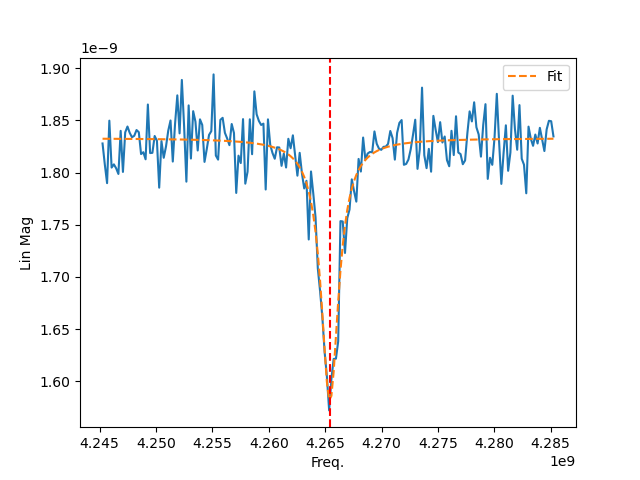

Qubit Frequency: 4265415213.319542


In [25]:
file = h5py.File(data_path + '00001_qubit_spec_pulse.h5' , 'r')

freq = np.array(file['drivefreq_pts'])[0]
log_mag = np.array(file['mags'])
lin_mag = 10**(log_mag/10)/1000
phase = np.array(file['phases'])
read_power = np.array(file['read_power'])[0]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(freq, lin_mag)
ax.set_ylabel('Lin Mag')
ax.set_xlabel('Freq.')

p = fitlor(freq, -lin_mag)
ax.plot(freq, -lorfunc(p, freq), linestyle='--', label="Fit")

resonator_freq = p[2]
ax.axvline(resonator_freq, linestyle='--', c='r')
print("Qubit Frequency:", p[2])

ax.legend()

## Qubit Spectroscopy Power Sweep

In [ ]:
filename='qubit_spec_pulse_powersweep'
config_file='D:\\_data\\20230222_T162_blueforssnowy_coffin cavity test\\config_pnax_rabi.json'
exp_name = "pulse_probe"

fname=PnaxPulseExperiment(exp_name, config_file, filename=filename, path=data_path)

D:\_data\20230222_T162_blueforssnowy_coffin cavity test\data\Time Domain\ test0
D:\_data\20230222_T162_blueforssnowy_coffin cavity test\config_pnax_rabi.json test
D:\_data\20230222_T162_blueforssnowy_coffin cavity test\config_pnax_rabi.json test1
{'aliases': {'pnax': 'PNAX'}, 'pulse_box_delay_adjust': {'pulse2': 0, 'pulse3': 0, 'pulse4': 0}, 'expt_trigger': {'period_ns': 250000.0}, 'flux': {'set_flux': True, 'current': 0.0029, 'range': 0.01, 'ramprate': 0.008}, 'readout': {'ADC_delay': 0, 'power': -25, 'delay': 0, 'width': 5000.0, 'freq': 7286576000.0}, 'drive': {'power': -20, 'width': 100000.0}, 'pump_drive': {'power': 12.5, 'freq': 5373894732.49}, 'qubit': {'freq': 4264947892.4623117, 'alpha': -177000000.0}, 'pulse_info': {'pi_time': 169.72, 'half_pi_time': 73.02}, 'vacuum_rabi': {'pi_pulse': False, 'start': 7275000000, 'stop': 7295000000, 'step': 150000.0, 'averages': 2000}, 'vacuum_rabi_focus_scan': {'pi_pulse': False, 'center': 7387775377.57879, 'range': 40000000.0, 'steps': 200, 

104it [03:53,  2.20s/it]

<IPython.core.display.Javascript object>


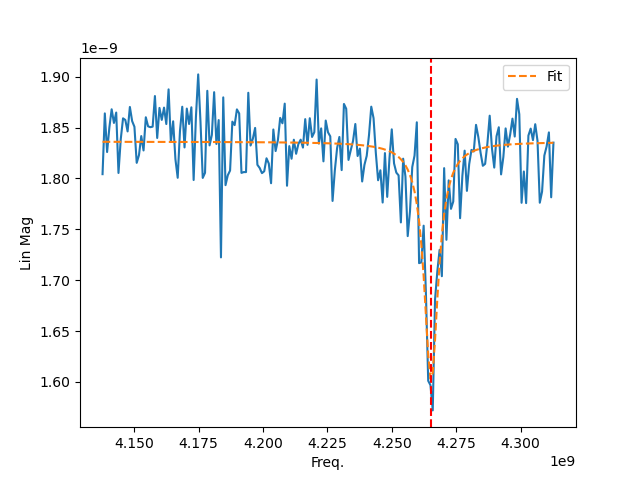

Qubit Frequency: 4265291748.487343


In [43]:
file = h5py.File(data_path + '00010_qubit_spec_pulse_powersweep.h5' , 'r')

freq = np.array(file['drivefreq_pts'])[0]
log_mag = np.array(file['mags'])
lin_mag = 10**(log_mag/10)/1000
phase = np.array(file['phases'])
read_power = np.array(file['read_power'])[0]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(freq, lin_mag)
ax.set_ylabel('Lin Mag')
ax.set_xlabel('Freq.')

p = fitlor(freq, -lin_mag)
ax.plot(freq, -lorfunc(p, freq), linestyle='--', label="Fit")

resonator_freq = p[2]
ax.axvline(resonator_freq, linestyle='--', c='r')
print("Qubit Frequency:", p[2])

ax.legend()

<IPython.core.display.Javascript object>


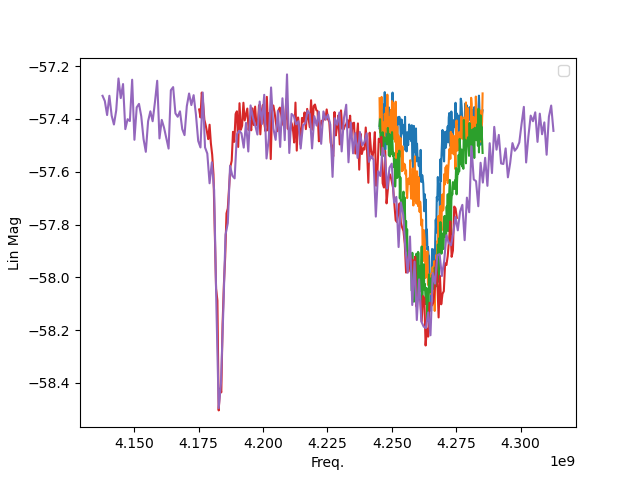

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [30]:
file = h5py.File(data_path + '00007_qubit_spec_pulse_powersweep.h5' , 'r')

fig = plt.figure()
ax = fig.add_subplot(111)

for i in ['00002', '00003', '00004', '00006', '00007']:
    file = h5py.File(data_path + i + '_qubit_spec_pulse_powersweep.h5' , 'r')
    freq = np.array(file['drivefreq_pts'])[0]
    log_mag = np.array(file['mags'])
    lin_mag = 10**(log_mag/10)/1000
    phase = np.array(file['phases'])
    read_power = np.array(file['read_power'])[0]
    ax.plot(freq, log_mag)



ax.set_ylabel('Lin Mag')
ax.set_xlabel('Freq.')

ax.legend()

## Rabi Oscillations

<IPython.core.display.Javascript object>


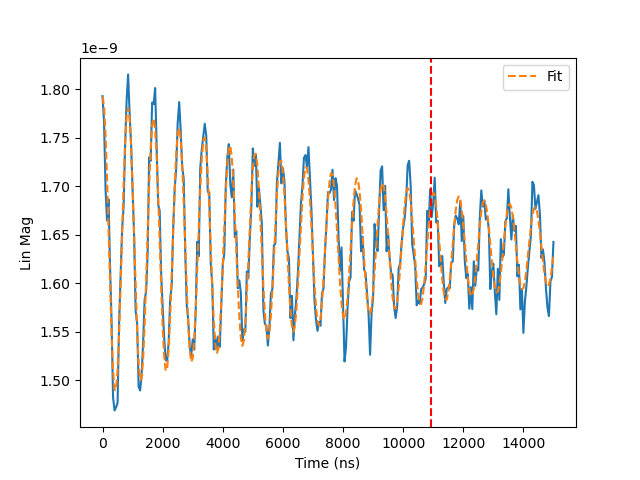

T2: 10921.757872984255


In [26]:
file = h5py.File(data_path + '00013_rabi.h5' , 'r')

time = np.array(file['time_pts'])
log_mag = np.array(file['mags'])
lin_mag = 10**(log_mag/10)/1000  # Why does Vatsan use /20?
phase = np.array(file['phases'])
read_power = np.array(file['read_power'])[0]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, lin_mag)
ax.set_ylabel('Lin Mag')
ax.set_xlabel('Time (ns)')

p = fitdecaysin(time, lin_mag)
ax.plot(time, decaysin(p, time), linestyle='--', label="Fit")

t2 = p[3]
ax.axvline(t2, linestyle='--', c='r')
print("T2:", p[3])

ax.legend()

## T1

<IPython.core.display.Javascript object>


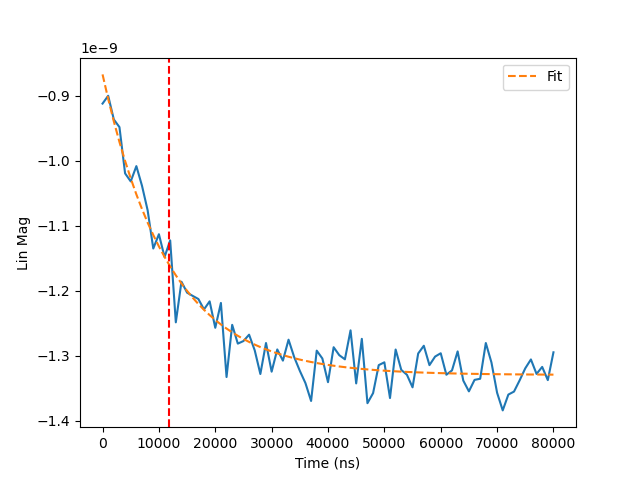

T1 (ns): 11776.979620933726


In [29]:
file = h5py.File(data_path + '00001_T1.h5' , 'r')

time = np.array(file['time_pts'])[0]
log_mag = np.array(file['mags'])
lin_mag = 10**(log_mag/10)/1000
phase = np.array(file['phases'])
read_power = np.array(file['read_power'])[0]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, -lin_mag)
ax.set_ylabel('Lin Mag')
ax.set_xlabel('Time (ns)')

p = fitexp(time, -lin_mag)
ax.plot(time, expfunc(p, time), linestyle='--', label="Fit")

t1 = p[3]
ax.axvline(t1, linestyle='--', c='r')
print("T1 (ns):", t1)

ax.legend()